## Homework 2 

<Axes: xlabel='final_price', ylabel='Count'>

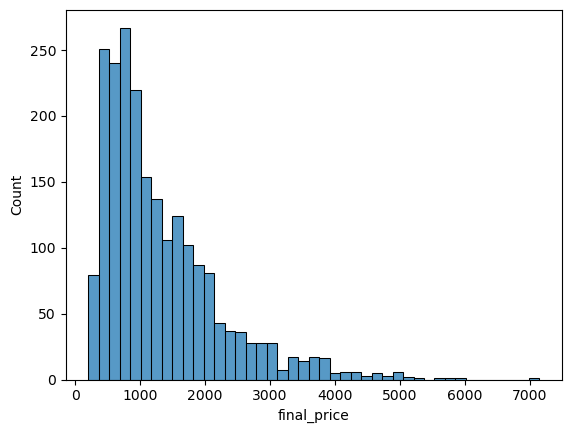

In [404]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('laptops.csv')

# Normalise the column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Chosen columns
columns = ['ram', 'storage', 'screen', 'final_price']

# Subset the dataframe with chosen columns 
df = df[columns]

sns.histplot(df['final_price'])

### Question 1

In [392]:
# Find the only column with missing data
missing_col = df.isna().sum().idxmax()

print(f'The only column with missing data is: {missing_col}')


The only column with missing data is: screen


### Question 2

In [393]:
median_ram = df.ram.median()
print(f'The median RAM is {int(median_ram)}GB')

The median RAM is 16GB


In [416]:
def prepare_data(df, seed=42):
    n = len(df)
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df = df.iloc[idx]
    df = df.fillna(0)

    n_train = int(n*0.2)
    n_val = int(n*0.2)
    n_test = n - (n_train + n_val)

    df_train = df.iloc[:n_train]
    df_val = df.iloc[n_train:n_train + n_val]
    df_test = df.iloc[n_train+n_val:]

    y_train = df_train['final_price'].values
    y_val = df_val['final_price'].values
    y_test = df_test['final_price'].values

    df_train = df_train.drop(columns=['final_price'])
    df_val = df_val.drop(columns=['final_price'])
    df_test = df_test.drop(columns=['final_price'])

    X_train = df_train.values
    X_val = df_val.values
    X_test = df_test.values
    
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = prepare_data(df)

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0]) 
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X) 
    XTX_inv = np.linalg.inv(XTX)
    XTY = X.T.dot(y)
    w_full = XTX_inv.dot(XTY)
    
    w0 = w_full[0]
    w = w_full[1:]
    
    return w0, w

w0, w = train_linear_regression(X_train, y_train)

y_pred = X_val.dot(w) + w0

def rmse(y, y_pred):
    rmse = np.sqrt((sum((y_pred - y) ** 2)) / len(y))
    
    return rmse

score = rmse(y_val, y_pred)
score

669.7029304765148

### Question 3

In [395]:
df_train_0 = df_train.fillna(0)
df_val_0 = df_val.fillna(0)

y_train = df_train_0['final_price'].values
y_val = df_val_0['final_price'].values

del df_train_0['final_price']
del df_val_0['final_price']

X_train = df_train_0.values
X_val = df_val_0.values

def train_linear_regression(X, y):
    
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    XTY = X.T.dot(y)
    w_full = XTX_inv.dot(XTY)
    
    w0 = w_full[0]
    w = w_full[1:]
    
    return w0, w

w0, w = train_linear_regression(X_train, y_train)

y_pred = X_val.dot(w) + w0

In [396]:
def rmse(y, y_pred):
    rmse = np.sqrt((sum((y_pred - y) ** 2)) / len(y))
    
    return rmse

round((rmse(y_val, y_pred)), 2)

669.7

In [397]:
mean_screen = df_train.screen.mean()

df_train_mean = df_train.fillna(mean_screen)
df_val_mean = df_val.fillna(mean_screen)

y_train = df_train_mean['final_price'].values
y_val = df_val_mean['final_price'].values

del df_train_mean['final_price']
del df_val_mean['final_price']

X_train = df_train_mean.values
X_val = df_val_mean.values

def train_linear_regression(X, y):
    
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    XTY = X.T.dot(y)
    w_full = XTX_inv.dot(XTY)
    
    w0 = w_full[0]
    w = w_full[1:]
    
    return w0, w

w0, w = train_linear_regression(X_train, y_train)

y_pred = X_val.dot(w) + w0

In [398]:
round((rmse(y_val, y_pred)), 2)

669.68

In [399]:
df_train_0 = df_train.fillna(0)
df_val_0 = df_val.fillna(0)

y_train = df_train_0['final_price'].values
y_val = df_val_0['final_price'].values

del df_train_0['final_price']
del df_val_0['final_price']

X_train = df_train_0.values
X_val = df_val_0.values

def train_linear_regression_reg(X, y, r=0.001):
    
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    XTY = X.T.dot(y)
    w_full = XTX_inv.dot(XTY)
    
    w0 = w_full[0]
    w = w_full[1:]
    
    return w0, w


for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = X_val.dot(w) + w0
    print(r, round(rmse(y_val, y_pred), 2))


0 669.7
0.01 669.7
0.1 669.71
1 669.79
5 670.29
10 670.64
100 671.43


In [403]:
df = pd.read_csv('laptops.csv')

# Normalise the column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Chosen columns
columns = ['ram', 'storage', 'screen', 'final_price']

# Subset the dataframe with chosen columns 
df = df[columns]

# Fill missing values in the original dataframe
df = df.fillna(0)

def check_random_seed(df):
    
    original_df = df.copy()
    total = []

    for i in range(10):
        
        df = original_df.copy()
        
        n = len(df)
        idx = np.arange(n)
        np.random.seed(i)
        np.random.shuffle(idx)
        
        df = df.iloc[idx]

        n_train = int(n*0.2)
        n_val = int(n*0.2)
        n_test = n - (n_train + n_val)

        df_train = df.iloc[:n_train]
        df_val = df.iloc[n_train:n_train + n_val]
        df_test = df.iloc[n_train+n_val:]

        df_train_ = df_train.fillna(0)
        df_val = df_val.fillna(0)

        y_train = df_train_['final_price'].values
        y_val = df_val['final_price'].values

        df_train_ = df_train_.drop(columns=['final_price'])
        df_val = df_val.drop(columns=['final_price'])

        X_train = df_train_.values
        X_val = df_val.values
        
        w0, w = train_linear_regression(X_train, y_train)

        y_pred = X_val.dot(w) + w0
        
        score = round((rmse(y_val, y_pred)), 2)
        
        print(f'Random seed {i}: {score}')
        
        total.append(score)
        
    print(np.std(total))
    
check_random_seed(df)

Random seed 0: 562.06
Random seed 1: 642.8
Random seed 2: 570.88
Random seed 3: 547.54
Random seed 4: 630.01
Random seed 5: 565.05
Random seed 6: 586.49
Random seed 7: 647.8
Random seed 8: 637.54
Random seed 9: 673.83
42.321735314138536
